# Predicting Heart Failure Using Clinical Records Dataset
## Phase 1: Data Preparation & Visualisation

#### Group Number:  45
***
**Name(s) & ID(s) of Group Members:** 
* Shreyas Ainapur, s3928704 
* Saisiva Devulapalli, s3931923
***

## Table of Contents
* [1. Introduction](#itr) 
  + [1.1.  Dataset Source](#Dataset-Source)
  + [1.2. Dataset Details](#Dataset-Details)
  + [1.3. Dataset Features](#Dataset-Features)
  + [1.4. Target Feature](#Target-Feature)
* [2. Goals and Objectives](#Goals-and-Objectives)
* [3. Data Cleaning and Preprocessing](#Data-Cleaning-and-Preprocessing)
* [4. Data Exploration and Visualisation](#4.-Data-Exploration-and-Visualisation)
* [5. Summary and Conclusion](#Summary-and-Conclusion)
* [5. References](#References)



## 1. Introduction <a id='itr'></a>

### Dataset Source

We have obtained the dataset from University of California Irvine (UCI) Machine Learning Repository. This dataset was elaborated by Davide Chicco (Krembil Research Institute, Toronto, Canada) in January 2020 and donated to UCI ML repository.

The original dataset version was collected by Tanvir Ahmad, Assia Munir, Sajjad Haider Bhatti, Muhammad Aftab, and Muhammad Ali Raza (Government College University, Faisalabad, Pakistan) and made available by them on FigShare under the Attribution 4.0 International copyright in July 2017.



### Dataset Details

Cardiovascular diseases (CVDs) are the leading cause of death worldwide, killing an estimated 17.9 million people each year, accounting for 31% of all deaths worldwide. Heart failure is a common complication of Cardiovascular diseases, and this dataset contains 12 features that can be used to predict heart failure mortality. The survival of heart failure patients admitted to the Institute of Cardiology and Allied Hospital in Faisalabad, Pakistan, in 2015 between April and December was examined and documented for creation of this dataset.

By analyzing behavioural risk factors such as tobacco use, physical inactivity, and hazardous alcohol use through population-wide strategies most of the cardiovascular disease can be prevented. People with cardiovascular disease or who are at high cardiovascular risk due to the presence of one or more risk factors such as high blood pressure, diabetes, anaemia or already established disease need early detection and management wherein a machine learning model can be of great help.

This dataset has a total of 13 features and 299 instances.

**Dataset Retrieval**

- We load the modules we will use throughout this report after reading the dataset from our local repository.
- We display 10 randomly sampled rows from this dataset.

In [1]:
import warnings
warnings.filterwarnings("ignore")

# importing the required packages
import numpy as np
import pandas as pd
import io
import requests
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None) 

In [2]:
# importing the dataset from our local repository to heart_data dataframe
heart_data = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [3]:
heart_data.sample(10, random_state=999)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
8,65.000,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
26,95.000,1,112,0,40,1,196000.00,1.0,138,0,0,24,1
142,50.000,0,482,1,30,0,329000.00,0.9,132,0,0,109,0
102,80.000,0,898,0,25,0,149000.00,1.1,144,1,1,87,0
97,70.000,1,59,0,60,0,255000.00,1.1,136,0,0,85,0
244,54.000,0,582,1,38,0,264000.00,1.8,134,1,0,213,0
152,50.000,0,115,0,45,1,184000.00,0.9,134,1,1,118,0
185,60.667,1,104,1,30,0,389000.00,1.5,136,1,0,171,1
123,60.000,1,582,0,30,1,127000.00,0.9,145,0,0,95,0
146,52.000,0,132,0,30,0,218000.00,0.7,136,1,1,112,0


### Dataset Features

The features in our dataset are described in the table below. These descriptions are taken from the Kaggle data source.

In [4]:
from tabulate import tabulate

table = [['age','Numeric','years','Age of the patient in years.'],
['anaemia','Binary','N/A','Decrease in hemoglobin or red blood cells.'],
['creatinine_phosphokinase','Numeric','mcg/L','Level of CPK enzyme in the blood per litre.'],
['diabetes','Binary','N/A','If patient suffers diabetes.'],
['ejection_fraction','Numeric','percentage','blood percent leaving the heart at each contraction.'],
['high_blood_pressure','Binary','N/A','If the patient suffers from hypertension.'],
['platelets','Numeric','kiloplatelets/mL','1000 platelets for every mL of blood in each patient.'],
['serum_creatinine','Numeric','mg/dL','The level of creatinine in the blood.'],
['serum_sodium','Numeric','mEq/L','The level of sodium in the blood.'],
['sex','Binary','N/A','It is a binary value defining male or female.'],
['smoking','Binary','N/A','It is boolean value stating if the patient smokes.'],
['time','Numeric','days','It is follow up period in days.'],
['DEATH_EVENT','Binary','N/A','If patient died during follow up period.']]

headers = ["Name", "Data type", "Units", "Brief Description"]

print(tabulate(table, headers, tablefmt='psql'))

+--------------------------+-------------+------------------+-------------------------------------------------------+
| Name                     | Data type   | Units            | Brief Description                                     |
|--------------------------+-------------+------------------+-------------------------------------------------------|
| age                      | Numeric     | years            | Age of the patient in years.                          |
| anaemia                  | Binary      | N/A              | Decrease in hemoglobin or red blood cells.            |
| creatinine_phosphokinase | Numeric     | mcg/L            | Level of CPK enzyme in the blood per litre.           |
| diabetes                 | Binary      | N/A              | If patient suffers diabetes.                          |
| ejection_fraction        | Numeric     | percentage       | blood percent leaving the heart at each contraction.  |
| high_blood_pressure      | Binary      | N/A          

### Target Feature

For this project, the target feature in this dataset will be the DEATH_EVENT. It tells if the patient deceased during the follow up period. In this dataset it is provided as a Binary feature, in which 0 represents the patient is alive and 1 implies death occured.

In [5]:
print(heart_data['DEATH_EVENT'].info())

<class 'pandas.core.series.Series'>
RangeIndex: 299 entries, 0 to 298
Series name: DEATH_EVENT
Non-Null Count  Dtype
--------------  -----
299 non-null    int64
dtypes: int64(1)
memory usage: 2.5 KB
None


## 2. Goals and Objectives

The key targets for modelling the given dataset with the implication of identifying patients who are more likely to die include:

- Develop a predictive model using the available clinical records to identify patients who are at higher risk of experiencing a death event. 
- Evaluate the predictive model's performance using appropriate metrics such as accuracy & precision.
- Determine the most important clinical features that predict a death event and assess their impact on model performance. 
- Investigate various machine learning algorithms and techniques in order to identify the best model for predicting death events in this dataset.
- Investigate potential sources of bias in the dataset and make necessary adjustments to the model to mitigate any unfairness or discrimination.

## 3. Data Cleaning and Preprocessing

### Data Cleaning Steps Performed

* The following are the data cleaning steps performed with the given code:

- Displaying the first 5 rows of the dataset using heart_data.head(5).
- Checking the shape of the dataset using heart_data.shape.
- Checking the data types of each column using heart_data.dtypes.
- Checking the sum of null values in each column using heart_data.isnull().sum().
- Describing the statistical features of the dataset using heart_data.describe().
- Replacing binary values with nominal values for sex, smoking, and DEATH_EVENT columns using husing replace().
- Creating boxplots for numeric features to detect outliers using a for loop with numeric_features list and boxplot() function.
- Defining a Z-score function to remove outliers, remove_outliers_zscore().
- Applying the remove_outliers_zscore() function to each numeric variable in the dataset using a for loop with numeric_features list.
- Checking if the age variable has any decimal values.
- Rounding the age variable to the nearest whole number using round().
- Changing the data types of columns age, anaemia, diabetes, high_blood_pressure to string and integer using astype()
- Printing a summary of catogorical and numerical features seperately.

#### Dropping irrelavent columns

Let's first display all the columns in our dataset.

In [6]:
heart_data.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

As the dataset doesn not have any ID type column or irrelavant column, we will not be dropping any variables. We will be retaining all 13 columns.

#### Exploratory Data Analysis

Exploratory Data Analysis helps us understand the dataset and its structure, we use EDA to identify any issues that need to be addressed during the data cleaning process.

In [7]:
#print the first five rows
heart_data.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [8]:
#print shape of the data set
heart_data.shape

(299, 13)

In [9]:
#Check the data types of each column
heart_data.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [10]:
#Check sum of null values
print(heart_data.isnull().sum())

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


In [11]:
# Describe statistical features of the data
heart_data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


Replacing the Binary values in columns **Sex, Smoking and Death_Event** to appropriate nominal catogorical objects for better readability of the data

In [12]:
# Replacing Binary Values to Nominal Values and displaying the data
heart_data['sex'] = heart_data['sex'].replace({0: 'female', 1: 'male'})
heart_data['smoking'] = heart_data['smoking'].replace({0: 'non-smoker', 1:'smoker'})
heart_data['DEATH_EVENT'] = heart_data['DEATH_EVENT'].replace({0: 'Not-Deceased', 1: 'Deceased'})

heart_data.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,male,non-smoker,4,Deceased
1,55.0,0,7861,0,38,0,263358.03,1.1,136,male,non-smoker,6,Deceased
2,65.0,0,146,0,20,0,162000.00,1.3,129,male,smoker,7,Deceased
3,50.0,1,111,0,20,0,210000.00,1.9,137,male,non-smoker,7,Deceased
4,65.0,1,160,1,20,0,327000.00,2.7,116,female,non-smoker,8,Deceased


#### Checking for Outliers

Plotting Box Plots for the numeric features in the variable to find outliers

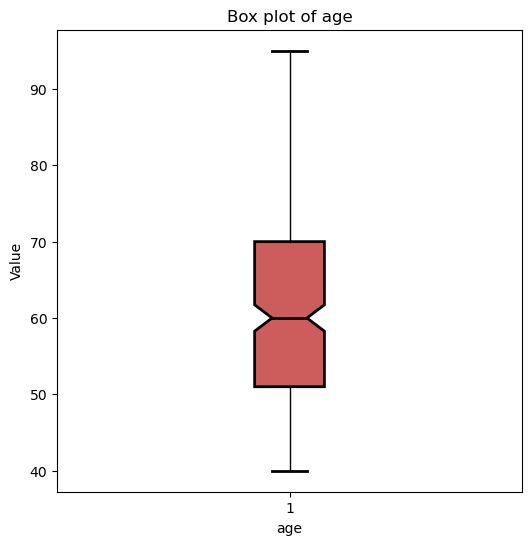

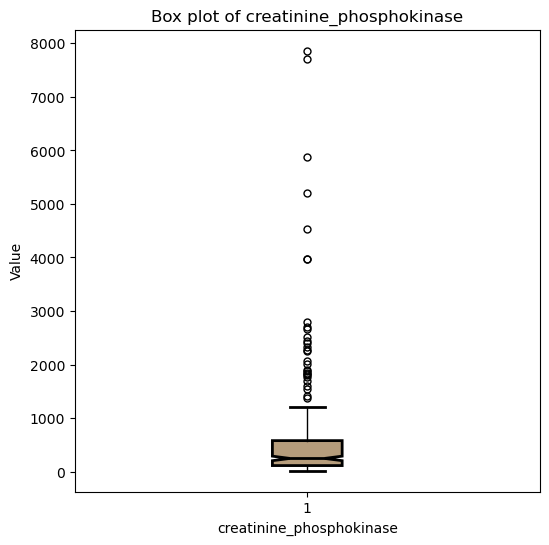

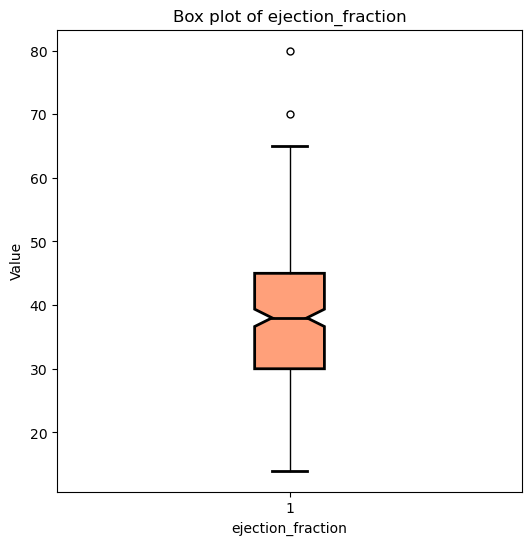

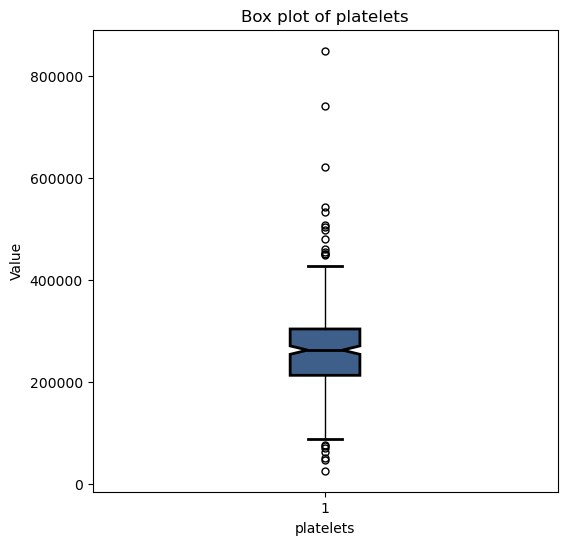

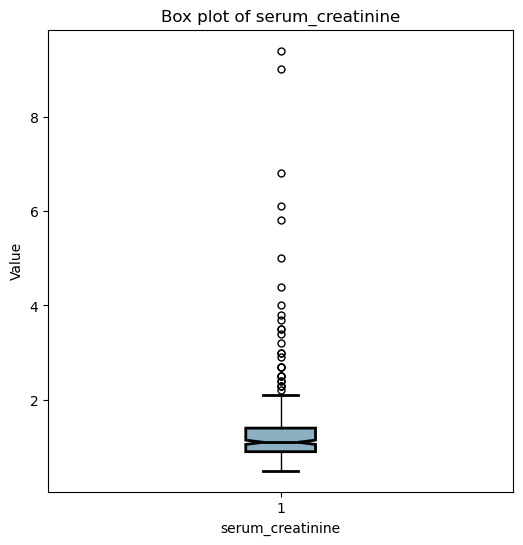

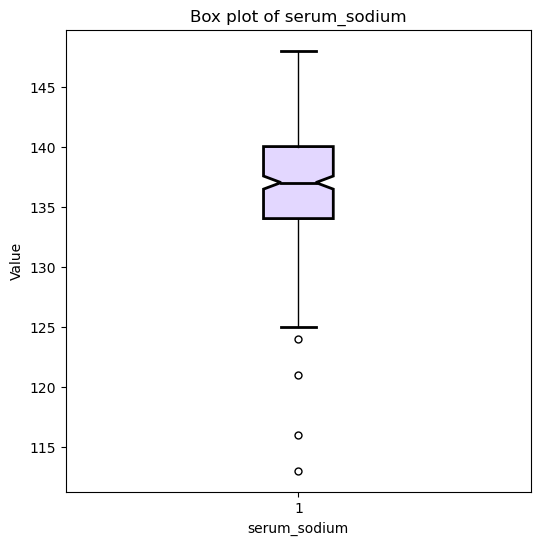

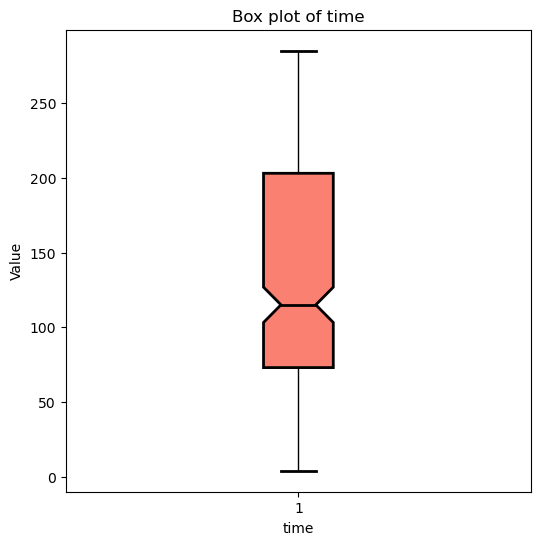

In [13]:
#Box_plots to find outliers
numeric_features = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets','serum_creatinine', 'serum_sodium', 'time']
color_codes = ['#CD5C5C', '#B69D7C', '#FFA07A','#3E5F8A', '#8AB0C2', '#E3D7FF', '#FA8072']

for i, feature in enumerate(numeric_features):
    fig, ax = plt.subplots(figsize=(6,6))
    box = ax.boxplot(heart_data[feature], notch=True, patch_artist=True, boxprops=dict(facecolor=color_codes[i], color='black'), whiskerprops=dict(color='black'), 
                     capprops=dict(color='black'), medianprops=dict(color='black'))
    plt.setp(box['fliers'], markeredgecolor='black', marker='o', markersize=5)
    plt.setp(box['caps'], linewidth=2)
    plt.setp(box['medians'], linewidth=2)
    plt.setp(box['boxes'], linewidth=2)

    ax.set_xlabel(feature)
    ax.set_ylabel('Value')
    ax.set_title(f'Box plot of {feature}')

    plt.show()


In [14]:
# Defining a Z-score function to remove outliers 
def remove_outliers_zscore(df, variable):
    zscore = (df[variable] - df[variable].mean()) / df[variable].std()
    # Identify the outliers (z-score > 3 or z-score < -3)
    outliers = df[abs(zscore) > 3]
    # Remove the outliers from the dataframe
    df = df[abs(zscore) <= 3]
    return df, outliers

# Applying the function to each numeric variable in the dataframe
for var in numeric_features:
    heart_data, outliers = remove_outliers_zscore(heart_data, var)
    print(f"Number of outliers in {var}: {len(outliers)}")
    
#Printing Shape of the data after removing outliers
print('\nThe shape of the dataframe after removing the outliers: ', end='')
print(heart_data.shape)

Number of outliers in age: 0
Number of outliers in creatinine_phosphokinase: 7
Number of outliers in ejection_fraction: 1
Number of outliers in platelets: 3
Number of outliers in serum_creatinine: 6
Number of outliers in serum_sodium: 3
Number of outliers in time: 0

The shape of the dataframe after removing the outliers: (279, 13)


Plotting Box Plots for the numeric features in the variable after removing the outliers

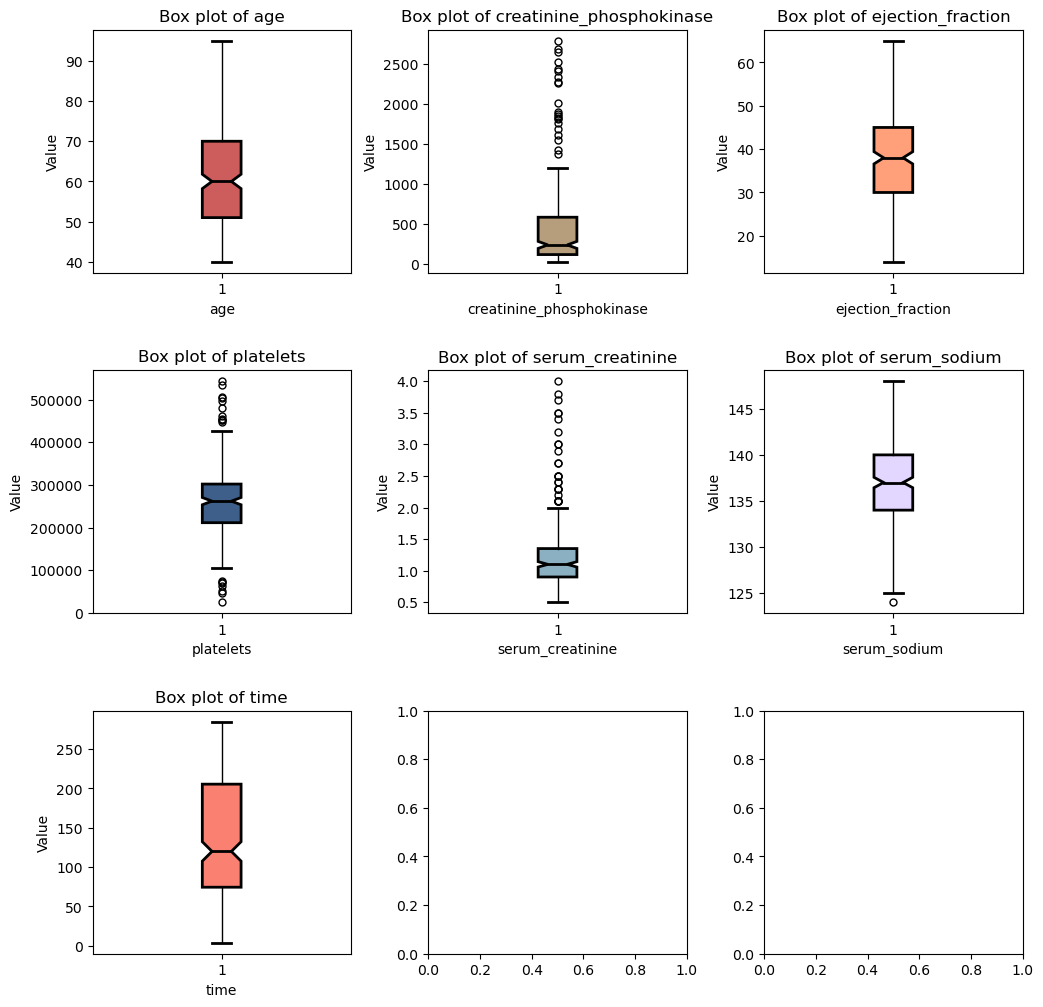

In [15]:
numeric_features = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']
color_codes = ['#CD5C5C', '#B69D7C', '#FFA07A', '#3E5F8A', '#8AB0C2', '#E3D7FF', '#FA8072']

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(12, 12))
fig.subplots_adjust(wspace=0.3, hspace=0.4)

for i, feature in enumerate(numeric_features):
    row = i // 3  # calculate the row index of the subplot
    col = i % 3   # calculate the column index of the subplot
    box = axs[row, col].boxplot(
        heart_data[feature], 
        notch=True, 
        patch_artist=True, 
        boxprops=dict(facecolor=color_codes[i], color='black'), 
        whiskerprops=dict(color='black'), 
        capprops=dict(color='black'), 
        medianprops=dict(color='black')
    )
    plt.setp(box['fliers'], markeredgecolor='black', marker='o', markersize=5)
    plt.setp(box['caps'], linewidth=2)
    plt.setp(box['medians'], linewidth=2)
    plt.setp(box['boxes'], linewidth=2)

    axs[row, col].set_xlabel(feature)
    axs[row, col].set_ylabel('Value')
    axs[row, col].set_title(f'Box plot of {feature}')

plt.show()

Checking if the age variable has any decimal value

In [16]:
#Checking if the age variable has any decimal value
if heart_data['age'].dtype == 'float64' and any(heart_data['age'] % 1 != 0):
    print('Age column has decimals')
else:
    print('Age column does not have decimals')

Age column has decimals


Since the age column has decimal values, we are rounding of the age to nearest whole number.
Then verifying agin if age column has any decimnals.

In [17]:
# Rounding of the age to nearest whole number
heart_data['age'] = round(heart_data['age'])

#Checking if the age variable has any decimal value
if heart_data['age'].dtype == 'float64' and any(heart_data['age'] % 1 != 0):
    print('Age column has decimals')
else:
    print('Age column does not have decimals')

Age column does not have decimals


Next we check the data types and observe that they match the intended data types, thus no change is needed here. 

In [18]:
# Check for data types
heart_data.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                          object
smoking                      object
time                          int64
DEATH_EVENT                  object
dtype: object

We are converting the data types of few columns for further computations and to minimize any confusions.

In [19]:
#Changing dtypes of following columns below
heart_data['age'] = heart_data['age'].astype(int)
heart_data['anaemia'] = heart_data['anaemia'].astype(str)
heart_data['diabetes'] = heart_data['diabetes'].astype(str)
heart_data['high_blood_pressure'] = heart_data['high_blood_pressure'].astype(str)

# Check for data types after changing the necessary data type conversions
print(f"Data types are below where string type are indicates as object: ")
heart_data.dtypes

Data types are below where string type are indicates as object: 


age                           int64
anaemia                      object
creatinine_phosphokinase      int64
diabetes                     object
ejection_fraction             int64
high_blood_pressure          object
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                          object
smoking                      object
time                          int64
DEATH_EVENT                  object
dtype: object

In [20]:
from IPython.display import display, HTML
display(HTML('<b>Table 1: Categorical features are summarised below</b>'))
heart_data.describe(include='object').T

,count,unique,top,freq
anaemia,279,2,0,158
diabetes,279,2,0,162
high_blood_pressure,279,2,0,179
sex,279,2,male,182
smoking,279,2,non-smoker,191
DEATH_EVENT,279,2,Not-Deceased,194


In [21]:
from IPython.display import display, HTML
display(HTML('<b>Table 2: Numerical features are summarised below</b>'))
heart_data.describe(include=['int64','float64','int32']).T

,count,mean,std,min,25%,50%,75%,max
age,279.0,60.906810,11.781216,40.0,51.0,60.0,70.00,95.0
creatinine_phosphokinase,279.0,456.379928,538.041625,23.0,114.0,235.0,582.00,2794.0
ejection_fraction,279.0,37.899642,11.440995,14.0,30.0,38.0,45.00,65.0
platelets,279.0,259245.944910,85461.510006,25100.0,211500.0,262000.0,302000.00,543000.0
serum_creatinine,279.0,1.264194,0.587586,0.5,0.9,1.1,1.35,4.0
serum_sodium,279.0,136.838710,3.924532,124.0,134.0,137.0,140.00,148.0
time,279.0,133.025090,77.125722,4.0,74.5,120.0,205.50,285.0


In [31]:
heart_data.to_csv('heart_data_new.csv', index=False)

## 4. Data Exploration and Visualisation

Now that pre-processing is performed on the dataset, it is considered to be clean and we can begin visualising and exploring each of the features.

### Univariate Visualisation



#### Histogram of Patient's Age

We count the region name to see which region has the highest count in Melbourne Housing in a descending order. As we can see in Figure 1, the Southern Metropolitan has the highest number of house sold compared to the 
other regions in Melbourne. 

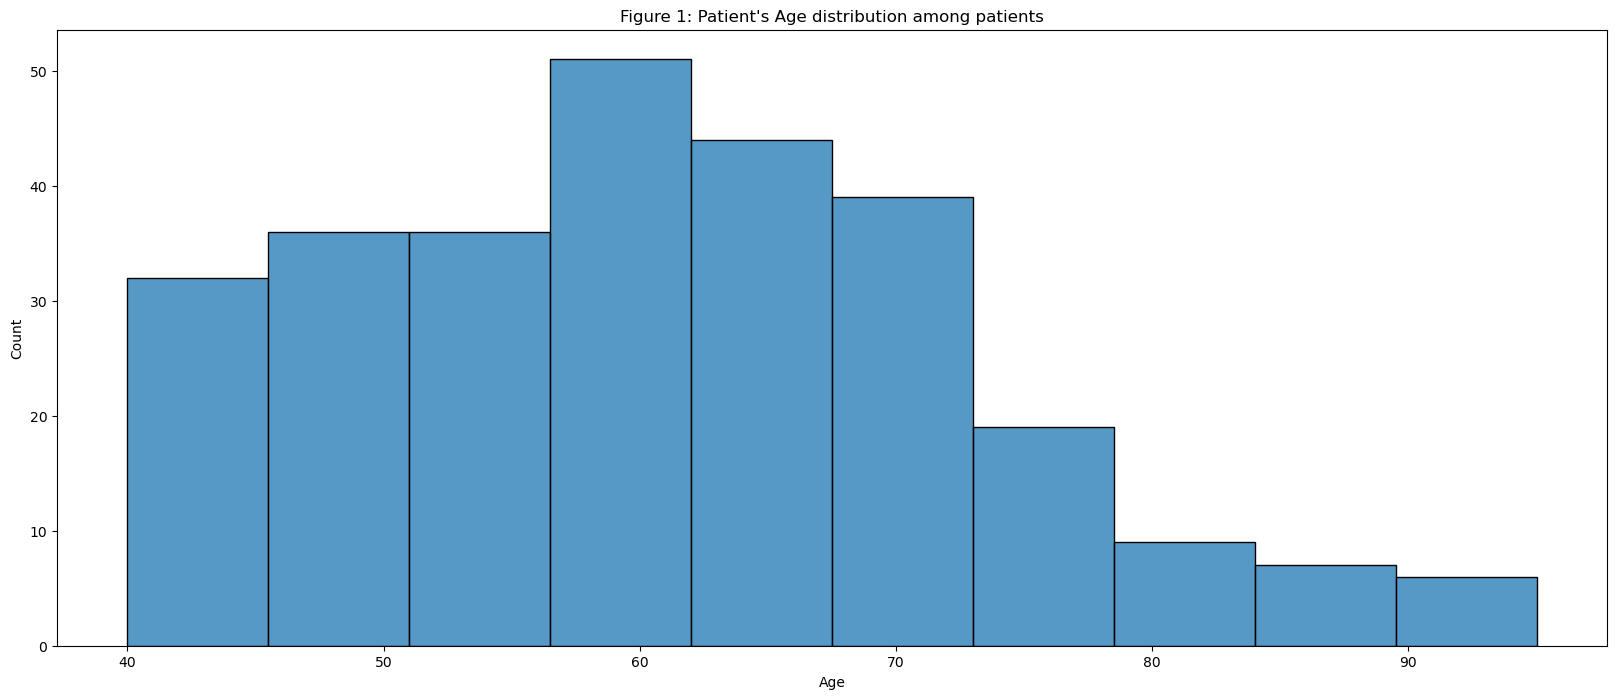

In [22]:
plt.figure(figsize = (20,8))

sns.histplot(heart_data['age'], kde=False)  # kde=False to disable the kernel density estimate line
plt.xlabel('Age')  # Set x-axis label
plt.ylabel('Count')  # Set y-axis label
plt.title("Figure 1: Patient's Age distribution among patients")  # Set title

plt.show()  # Show the plot

#### Kernel density plot of Ejection Fraction

From Figure 2, we can see the probability that most of the patients having an ejction fraction of 40% is the highest. The normal ejction fraction is 50% or higher. This implies that the for most of the patients, the heart isn't pumping enough blood and might be failing.

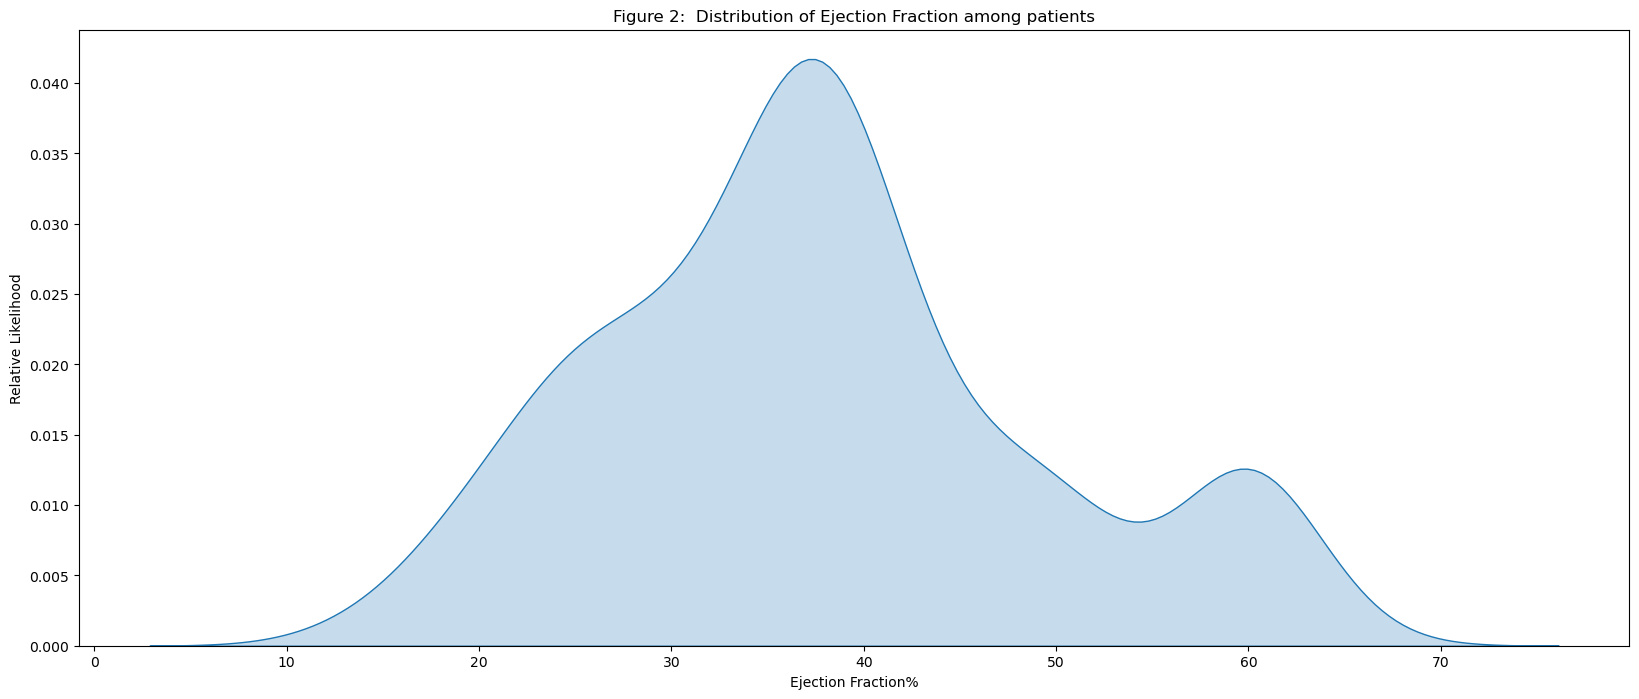

In [23]:
plt.figure(figsize = (20,8))

sns.kdeplot(heart_data['ejection_fraction'], shade=True)  # shade=True to fill the area under the density curve
plt.xlabel('Ejection Fraction%')  # Set x-axis label
plt.ylabel('Relative Likelihood')  # Set y-axis label
plt.title('Figure 2:  Distribution of Ejection Fraction among patients')  # Set title

plt.show()  # Show the plot

#### Violin plot of Serum Sodium

The distribution of serum sodium is shown in below Figure 3. In the plot it is clear the data is concentrated between 135 and 140. Sodium is needed for the body to function but too much of it is linked to high blood pressure leading to heart failures.

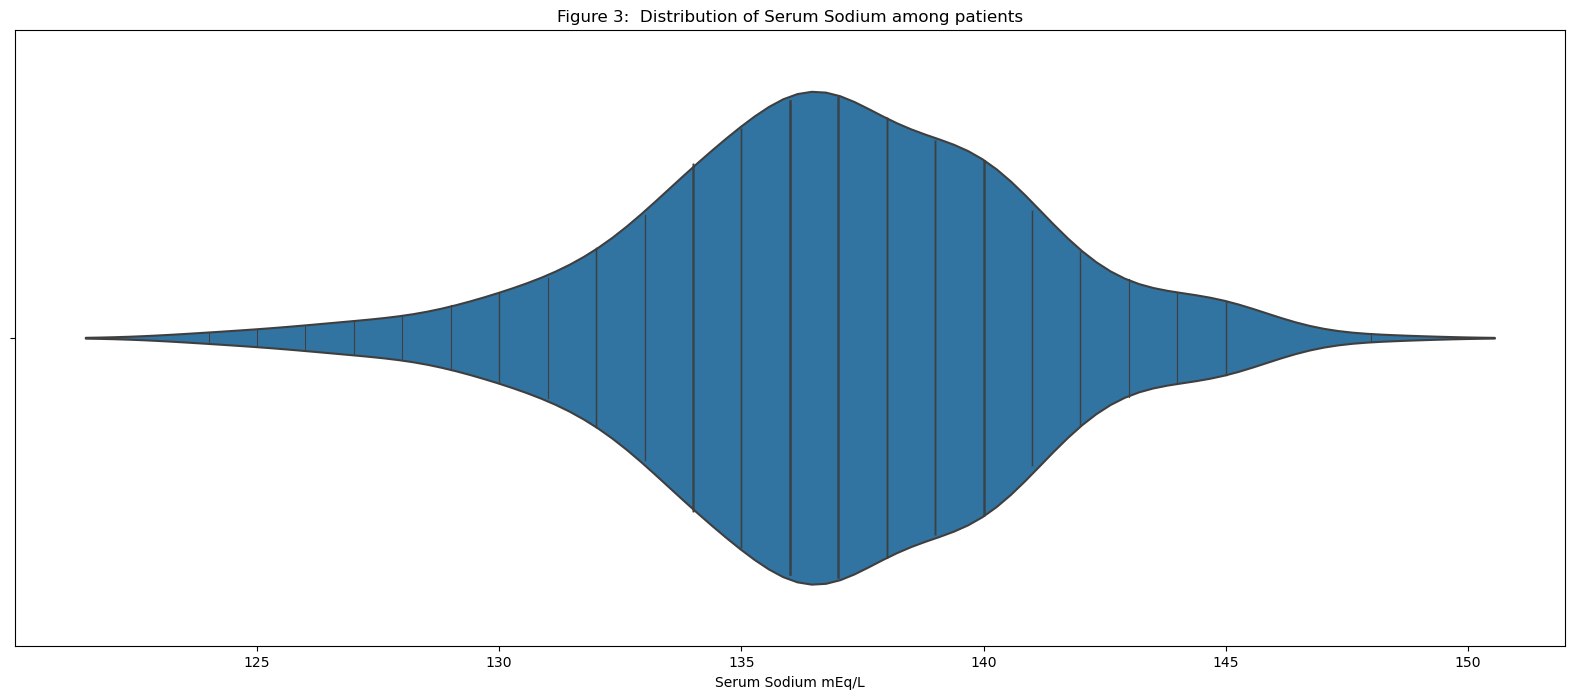

In [24]:
plt.figure(figsize = (20,8))

sns.violinplot(heart_data['serum_sodium'], inner='stick') # inner='stick' to show individual data points
plt.xlabel('Serum Sodium mEq/L')  # Set x-axis label
plt.title('Figure 3:  Distribution of Serum Sodium among patients')  # Set title

plt.show()  # Show the plot


### Two-Variable Visualisation

#### Bar plot of time and DEATH_EVENT

Figure 4 shows correlation between the follow up period (time) and the number of patient deceased (DEATH_EVENT). It can be seen in the plot below that all the patients who had a longer follow up period are able to survive however, it does not guarantee it.

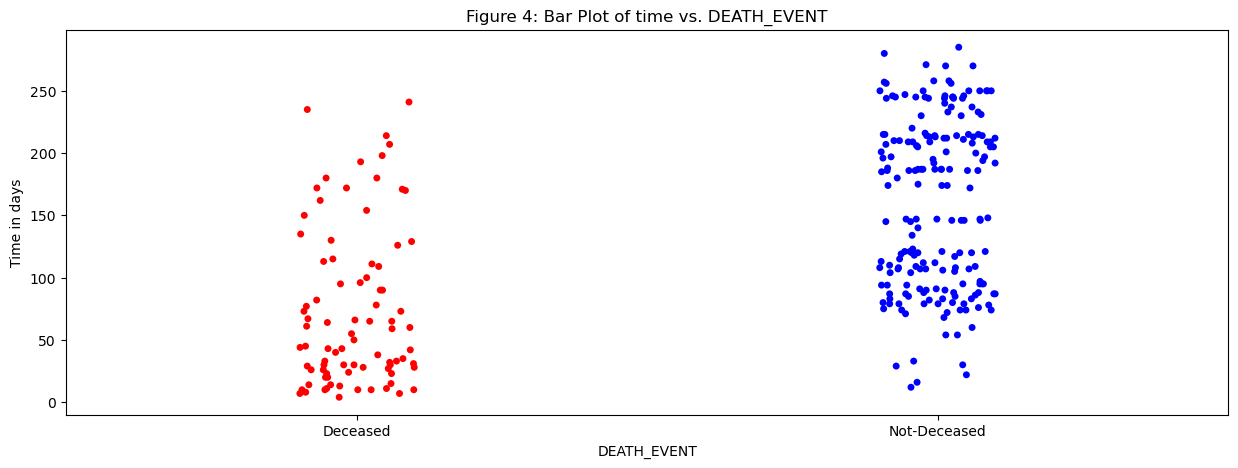

In [25]:
plt.figure(figsize = (15,5))
custom_palette = {'Deceased': 'red', 'Not-Deceased': 'blue'}
# bar plot using Seaborn
sns.stripplot(x=heart_data['DEATH_EVENT'], y=heart_data['time'], palette=custom_palette)

# Add labels and title
plt.xlabel('DEATH_EVENT')
plt.ylabel('Time in days')
plt.title('Figure 4: Bar Plot of time vs. DEATH_EVENT')

# Show the plot
plt.show()

#### Line plot of Age and Ejection Fraction

Figure 5 shows that relation between age and ejection fraction is non linear where the least value of ejction fraction is between age 40 and 50 and highest value of ejction fraction is between age 60 and 70. Morever, among the patients most of them have ejection fraction below 50 irrespective of age. 

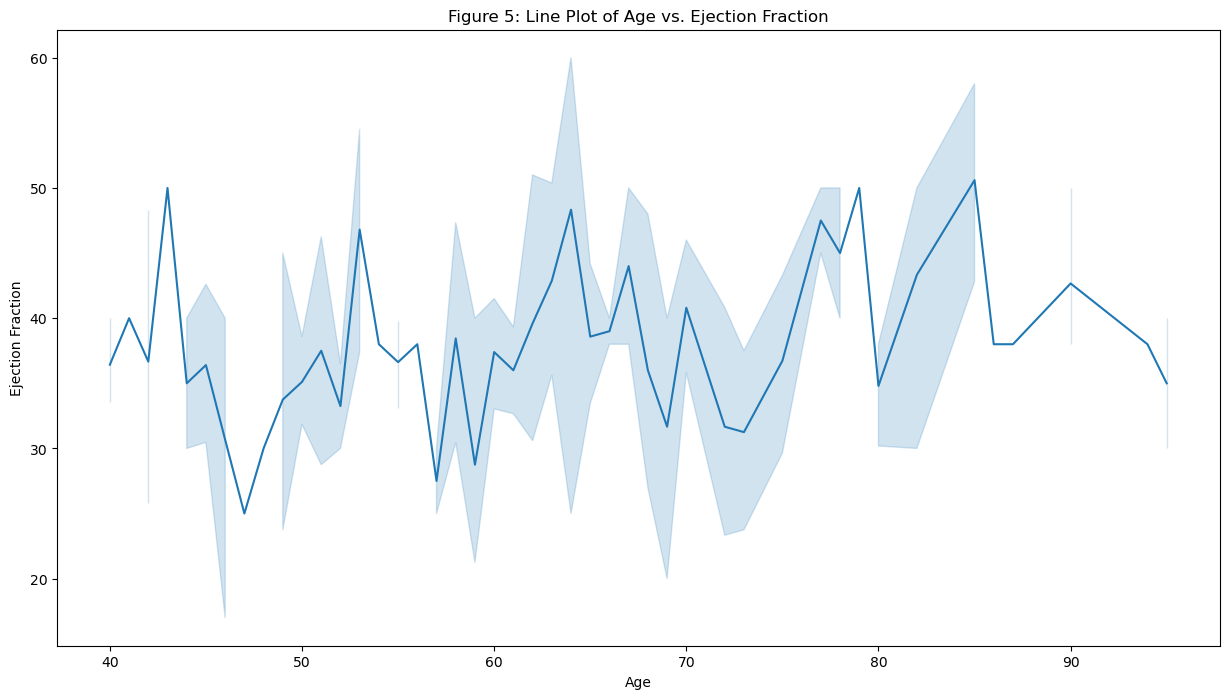

In [26]:
plt.figure(figsize = (15,8))
# line plot using Seaborn
sns.lineplot(x=heart_data['age'], y=heart_data['ejection_fraction'])

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Ejection Fraction')
plt.title('Figure 5: Line Plot of Age vs. Ejection Fraction')

# Show the plot
plt.show()

#### Barplot of Age and DEATH_EVENT

From the Figure 6, it is can be seen that higher number of survived patients lie below the age of 60

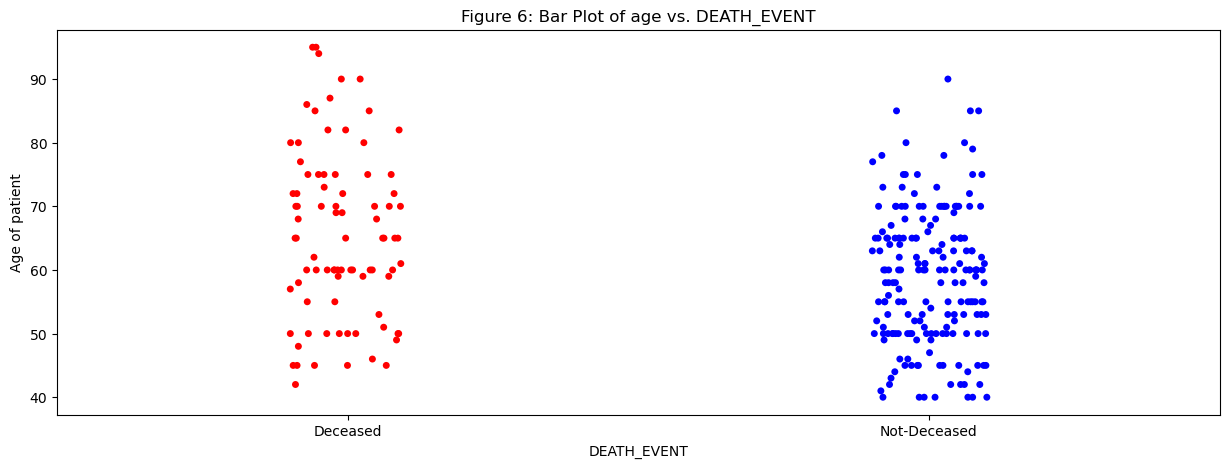

In [27]:
plt.figure(figsize = (15,5))
# bar plot using Seaborn
sns.stripplot(x=heart_data['DEATH_EVENT'], y=heart_data['age'], palette=custom_palette)


# Add labels and title
plt.xlabel('DEATH_EVENT')
plt.ylabel('Age of patient')
plt.title('Figure 6: Bar Plot of age vs. DEATH_EVENT')

# Show the plot
plt.show()

### Three-Variable Visualisation

#### Boxplot of Serum Sodium with Sex and Death Event

Figure 7 shows the comparison between three variables. Serum sodium value between both genders lying between 135 and 140 are likely to survive from heart failure.

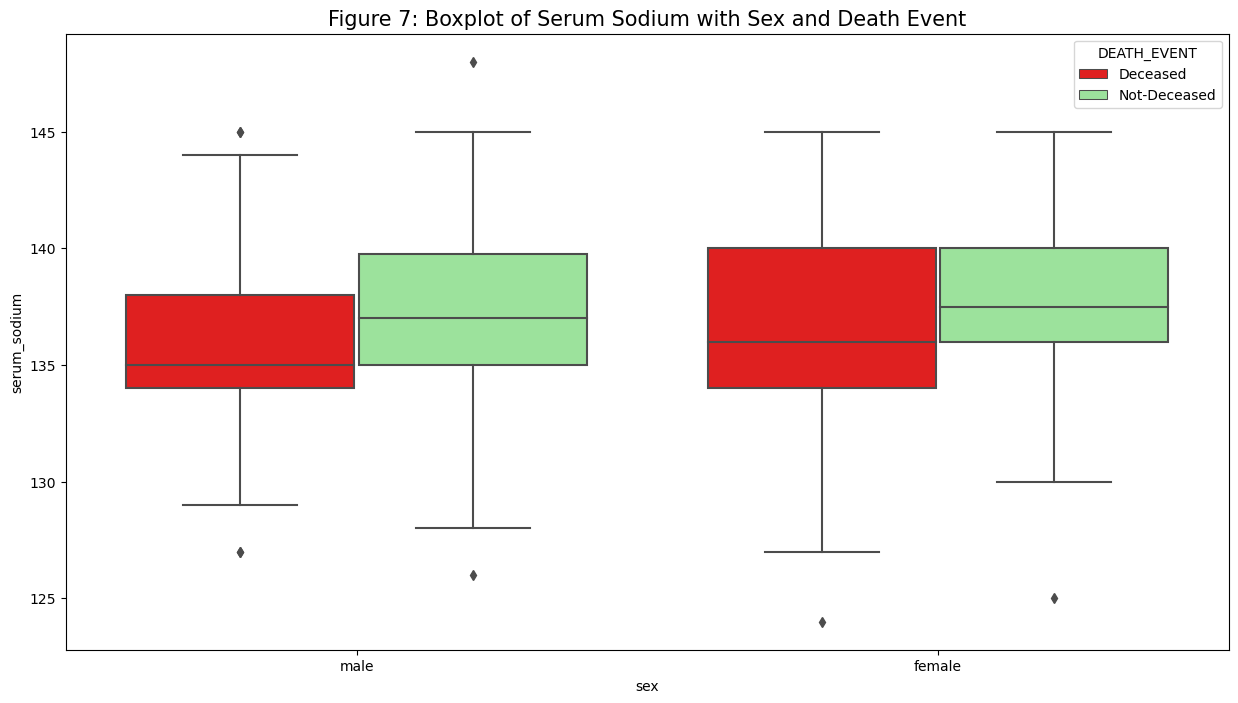

In [28]:
plt.figure(figsize = (15,8))
custom_palette = {'Deceased': 'red', 'Not-Deceased': 'lightgreen'}
sns.boxplot(heart_data['sex'], heart_data['serum_sodium'], 
            hue = heart_data['DEATH_EVENT'], palette=custom_palette)
plt.title('Figure 7: Boxplot of Serum Sodium with Sex and Death Event', fontsize = 15)
plt.show();

#### Scatterplot between follow up period (time), serum phosphokinase and death event'

Figure 8 clearly shows how the data varies between creatinine phosphokinase and time with respect to death event. It can be seen from the below plot that if the time value is low irrespective of the creatinine phosphokinase the patient is highly likley to be deceased and vice versa.

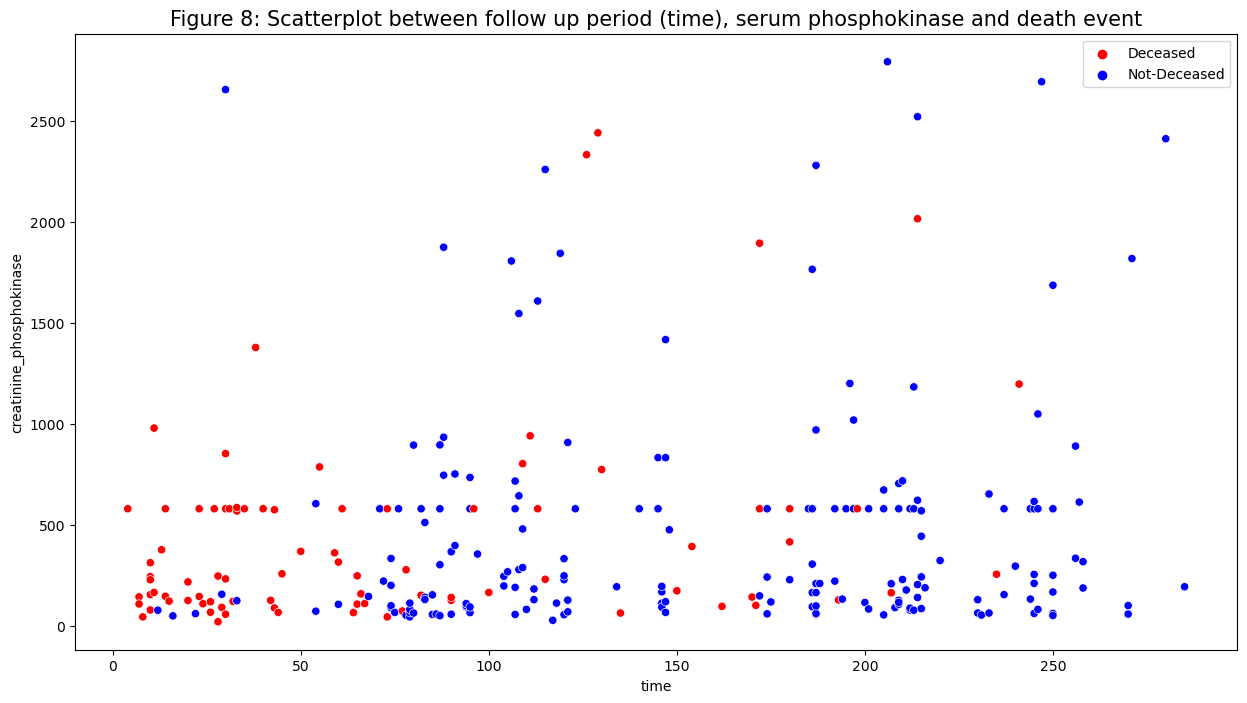

In [29]:
plt.figure(figsize = (15,8))
custom_palette = {'Deceased': 'red', 'Not-Deceased': 'blue'}
sns.scatterplot(heart_data['time'], heart_data['creatinine_phosphokinase'], hue = heart_data['DEATH_EVENT'], palette = custom_palette)
plt.title('Figure 8: Scatterplot between follow up period (time), serum phosphokinase and death event', fontsize = 15);
plt.legend(loc = 'upper right')
plt.show()

#### Barplot checking if the deceased patient was smoking or not accross their age

In Figure 9, we can see that among the deceased patients who smoke age plays a crucial role as old people are more likely to die. Whereas, among the deceased patients who don't smoke age factor is not significant.

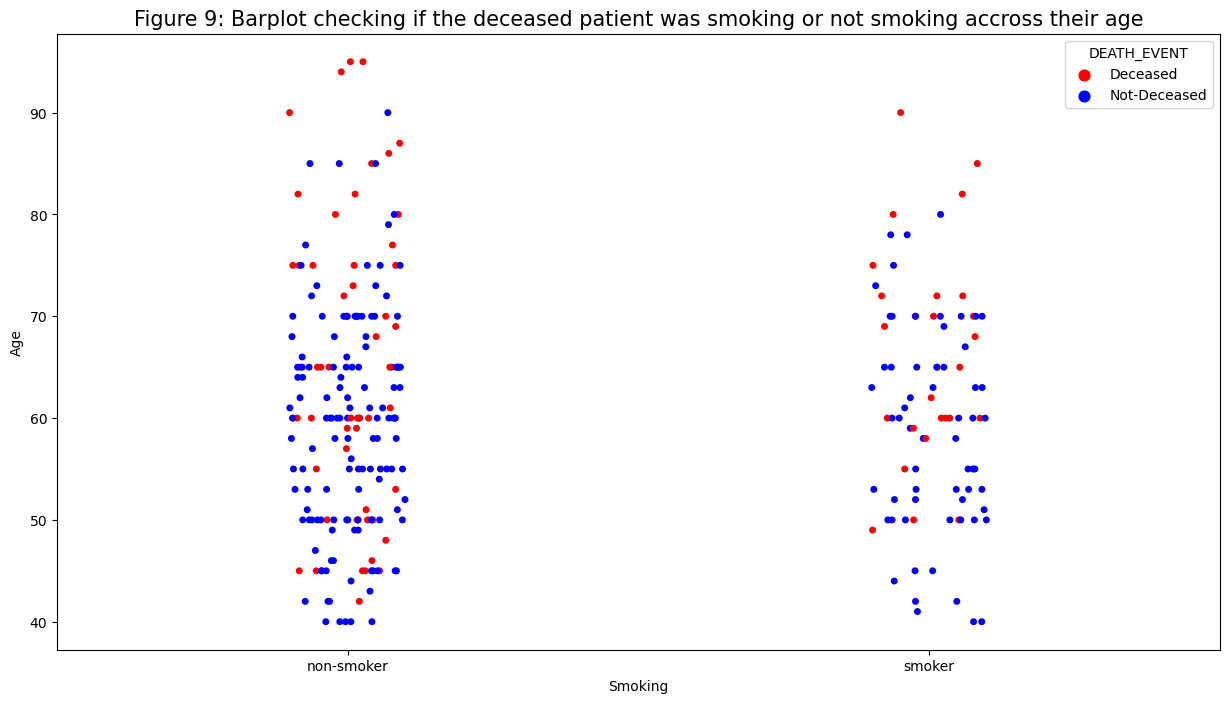

In [30]:
plt.figure(figsize = (15,8))
fig_4 = sns.stripplot(x ='smoking', y ='age', hue = 'DEATH_EVENT', data = heart_data, palette = custom_palette)
plt.title('Figure 9: Barplot checking if the deceased patient was smoking or not smoking accross their age', fontsize = 15)
plt.xlabel('Smoking', fontsize = 10)
plt.ylabel('Age', fontsize = 10) 
plt.show()

## Summary and Conclusions

The information provided is on the health problems of heart disease patients. It contains, among other things, age, gender, smoking habits, serum sodium level, ejection fraction, creatinine phosphokinase levels, and follow-up length.

Several data cleaning activities were carried out prior to the analysis to verify that the data was accurate and available for analysis. Displaying the first 5 rows of the dataset, checking the shape and data types of each column, checking for null values, describing the statistical features of the dataset, replacing binary values with nominal values, creating boxplots to detect outliers, defining a Z-score function to remove outliers, rounding age to the nearest whole number, and changing data types were among the steps.

To better comprehend the data, several visualisations were built. Histograms were utilised to depict the age and ejection fraction distributions. The distribution of serum sodium was visualised using violin plots. To compare the follow-up period with the death event and smoking patterns with age, bar plots were employed. Age and ejection percent were compared using line graphs. The distribution of serum sodium with sex and death event was visualised using box plots. The link between the follow-up period, creatinine phosphokinase levels, and the death event was visualised using scatter plots.

The visualisations show that the age range of patients with heart disease extends from 40 to 95, with the majority of patients falling between the ages of 50 and 70. The ejection fraction distribution reveals that the majority of patients have a normal ejection fraction, with only a tiny number having extremely low ejection fraction levels. The blood sodium distribution reveals that the majority of individuals have normal serum sodium levels, with only a few having unusually high or low levels.

It was also shown that patients with poor ejection fraction levels, high creatinine phosphokinase levels, and low serum sodium levels were more likely to die. Patients who encountered the death event had a shorter follow-up period than those who did not. The gender of the patient had no effect on the death event, however serum sodium levels were frequently lower in male patients than female patients. Smoking was more common in younger patients, and smokers were more likely to die than nonsmokers.

In conclusion, the heart failure dataset analysis revealed some intriguing findings. Age, ejection fraction, serum creatinine, and serum sodium levels are all important predictors of heart failure, according to the findings. Patients who have a history of hypertension, diabetes, or anaemia are also at a higher risk of developing heart failure. The study also discovered that men are more likely than women to suffer from heart failure. Furthermore, smokers are more likely to die from heart failure. The study emphasises the significance of lifestyle changes and early identification in preventing heart failure. According to the findings, healthcare providers should monitor and manage risk factors in their patients in order to lower the occurrence of heart failure and its related mortality.

## References

- Becker, D. (n.d.). Melbourne Housing Snapshot (Kaggle). Retrieved September 21, 2021 from https://www.kaggle.com/dansbecker/melbourne-housing-snapshot

***